The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Top Gender : Male
Top Country : United States of America


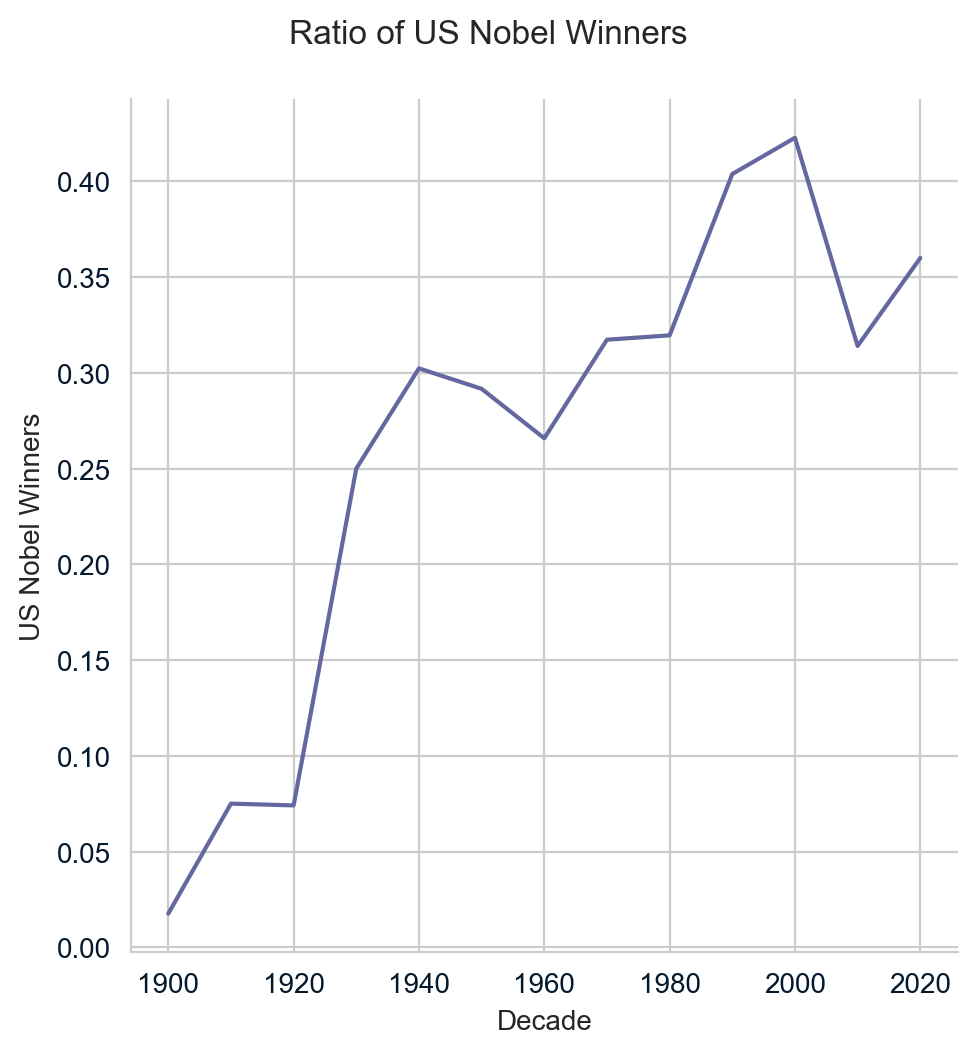

2000
{2020: 'Literature'}


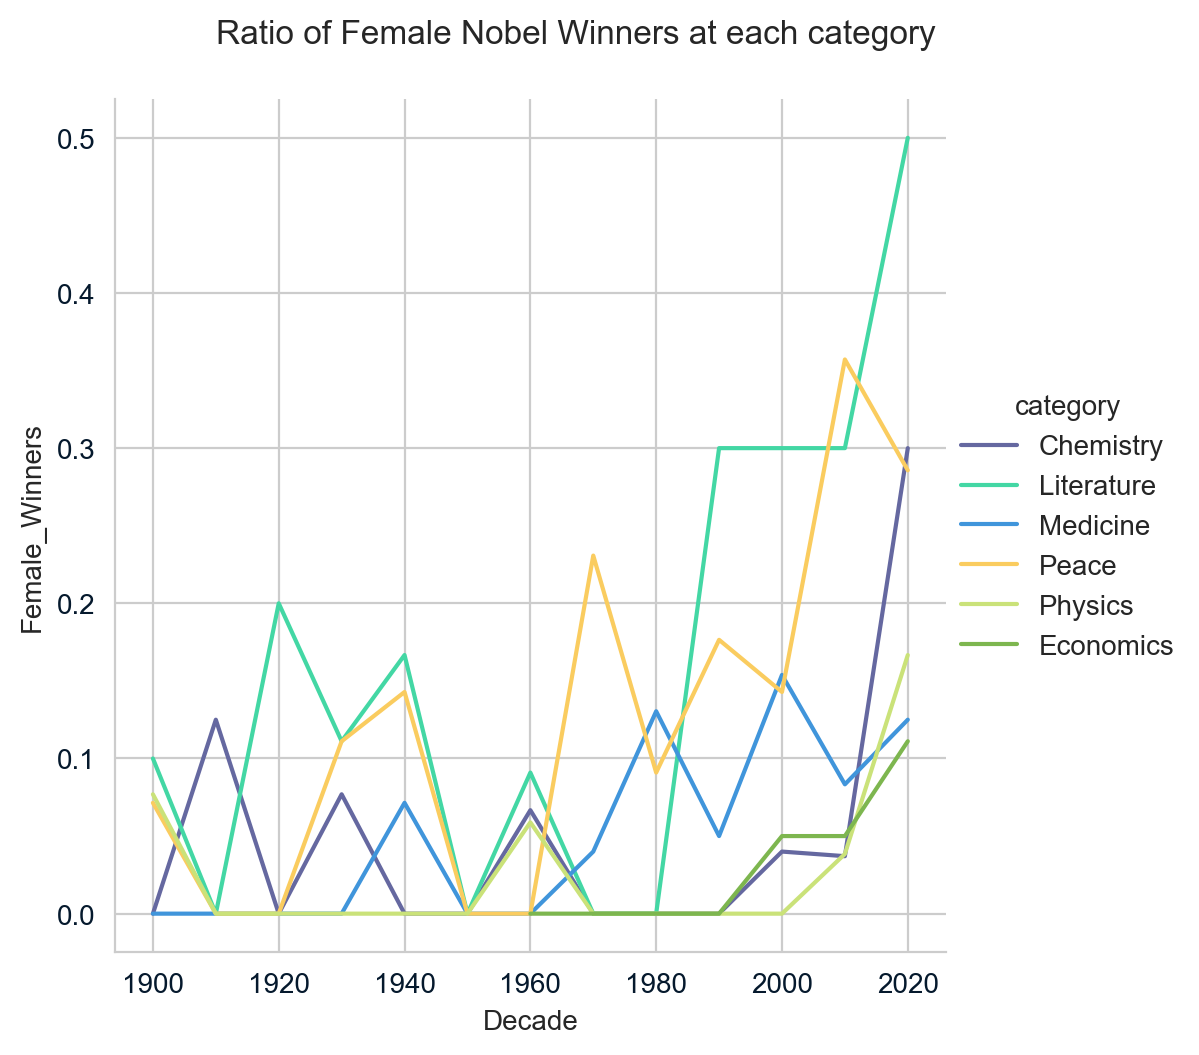

First Woman to win Nobel : Marie Curie, née Sklodowska
She won it at : Physics
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [61]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!
sns.set_style('whitegrid')
nobel = pd.read_csv('data/nobel.csv')
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]
print('Top Gender : ' +str(top_gender)+'\nTop Country : '+str(top_country))
nobel['usa_born_winners'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (nobel['year'] // 10) * 10
nobel['decade'] = nobel['decade'].astype(int)
winners_per_decade = nobel.groupby('decade',as_index=False).agg({'usa_born_winners':'mean'})
g = sns.relplot(x='decade',y='usa_born_winners',data=winners_per_decade,kind='line')
g.set(xlabel='Decade',ylabel='US Nobel Winners')
g.fig.suptitle('Ratio of US Nobel Winners',y=1.05)
plt.show()
max_decade_usa = nobel.query('usa_born_winners == True')['decade'].mode()[0]
print(max_decade_usa)
nobel['is_female'] = nobel['sex'] == 'Female'
female_decade = nobel.groupby(['decade', 'category'], as_index=False).agg({'is_female':'mean'})
max_female_decade = female_decade.loc[female_decade['is_female'].idxmax()]
max_female_dict = {max_female_decade['decade']:max_female_decade['category']}
print(max_female_dict)
j = sns.relplot(x='decade',y='is_female',data=female_decade,hue='category',kind='line')
j.set(xlabel='Decade',ylabel='Female_Winners')
j.fig.suptitle('Ratio of Female Nobel Winners at each category',y=1.05)
plt.show()
first_woman_row = nobel.query('is_female == True').sort_values('year').iloc[0]
first_woman_name = first_woman_row['full_name']
first_woman_category = first_woman_row['category']
print('First Woman to win Nobel : '+str(first_woman_name)+'\nShe won it at : '+str(first_woman_category))
repeated_winners = pd.DataFrame(nobel['full_name'].value_counts().reset_index())
repeated_winners.columns = ['full_name', 'count']
repeat_list = list(repeated_winners[repeated_winners['count'] >= 2]['full_name'])
print(repeat_list)